In [1]:
import utils
import glob
import numpy as np
import matplotlib.pyplot as plt


/mnt/lustre/users/astro/bb345/1-4MOST/3-CRS/4-crs_tools/1-4MOST_CRS_tools/CRStools/utils.py:263: SyntaxWarning: invalid escape sequence '\p'
  """Shift `ra` to the origin of the Axes object and convert to radians.


In [2]:
size_ratio = 1
sub_width, sub_height = size_ratio*10/3, size_ratio*2.8
SMALL_SIZE = 9
MEDIUM_SIZE = 10
BIGGER_SIZE = 11

rc_default = {}
rc_default['font.family'] = 'serif'
rc_default['font.size'] = SMALL_SIZE
rc_default['axes.labelsize'] = MEDIUM_SIZE
rc_default['axes.labelweight'] = 'normal'
rc_default['axes.linewidth'] = 0.8

rc_default['axes.titlesize'] = MEDIUM_SIZE
rc_default['xtick.labelsize'] = SMALL_SIZE
rc_default['ytick.labelsize'] = SMALL_SIZE
rc_default['legend.fontsize'] = SMALL_SIZE
rc_default['figure.titlesize'] = BIGGER_SIZE
rc_default['lines.linewidth'] = 0.8
rc_default['lines.markersize'] = 3
rc_default['figure.figsize'] = (sub_width, sub_height)
rc_default['savefig.dpi'] = 450

# Latex related
rc_default['text.usetex'] = True
rc_default['mathtext.fontset'] = 'custom'
rc_default['mathtext.rm'] = 'Bitstream Vera Sans'
rc_default['mathtext.it'] = 'Bitstream Vera Sans:italic'
rc_default['mathtext.bf'] = 'Bitstream Vera Sans:bold'

plt.rcParams.update(rc_default)
plt.style.use('tableau-colorblind10')

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

markers = ['s', 'o', 'D', 'x', '>', '<', 'p', '*', 'h', '+', 'x']

/its/home/bb345/.conda/envs/clustering-3.12/lib/python3.12/site-packages/healpy/visufunc.py:764: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))
/mnt/lustre/users/astro/bb345/1-4MOST/3-CRS/4-crs_tools/1-4MOST_CRS_tools/CRStools/utils.py:1109: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


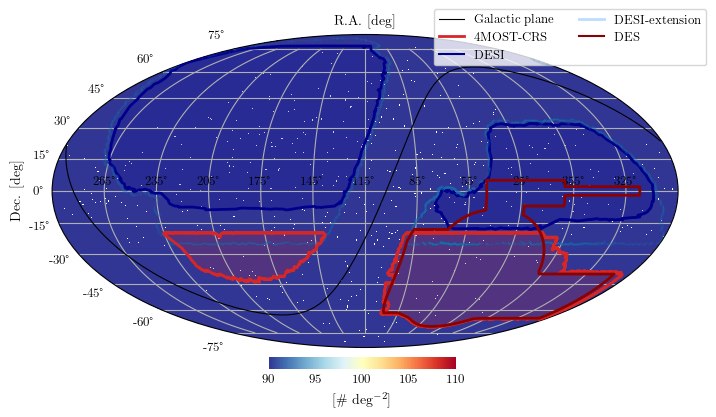

In [3]:
# Generate random sky Catalog
ra, dec = utils.random_point_on_sky(1000000)

# Create healpix map
hpmap = utils.create_hp_map(ra, dec, nside=128)

# plot Sky map
utils.plot_moll(hpmap, rot=115, min=100, max=100, desi_footprint_ext=True,desi_footprint=True, fourmost_footprint=True, des_footprint=True)

/its/home/bb345/.conda/envs/clustering-3.12/lib/python3.12/site-packages/healpy/visufunc.py:764: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))
/mnt/lustre/users/astro/bb345/1-4MOST/3-CRS/4-crs_tools/1-4MOST_CRS_tools/CRStools/utils.py:1109: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


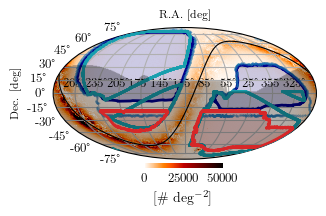

In [4]:
import fitsio
import utils

tt = fitsio.FITS('data/pixweight-dr10-128-new.fits')[1]
stardens = tt['STARDENS'][:]
utils.plot_moll(stardens, rot=115, min=000, max=50000, cmap='gist_heat_r', desi_footprint=True, lsst_fp=True, fourmost_footprint=True, euclid_fp=True, nest=True, figsize=(10/3,4), desi_footprint_ext=True, fontsize=8, show_legend=False)
    

/its/home/bb345/.conda/envs/clustering-3.12/lib/python3.12/site-packages/healpy/visufunc.py:764: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))


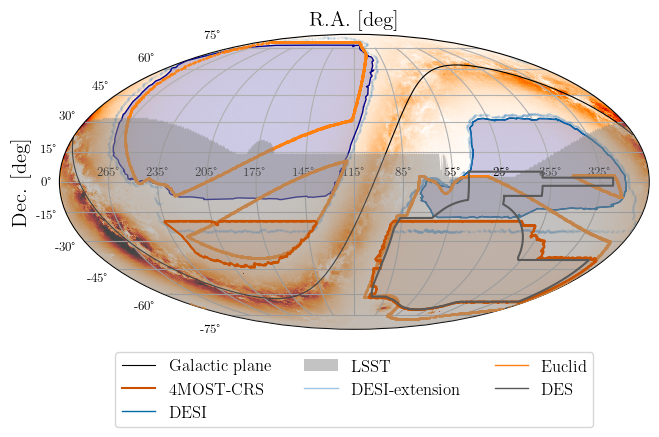

In [9]:
# fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, num=2, figsize=(2*sub_width, 2*sub_height), projection='mollweide')
plt.figure(figsize=(sub_width, sub_height))
ax = plt.subplot(111, projection='mollweide')
ax, handles, labels = utils.plot_moll_behnood(stardens, rot=115, min=000, max=50000, cmap='gist_heat_r', 
                        desi_footprint=True, lsst_fp=True, fourmost_footprint=True, 
                        euclid_fp=True, nest=True, figsize=(20/3,16), 
                        desi_footprint_ext=True, fontsize=15, show_legend=False,
                        des_footprint=True)
 
ax.legend(handles, labels, ncol=3, loc='upper center', bbox_to_anchor=(0.5, -0.05), fontsize=12)

# plt.legend(loc='lower left', fontsize=8, framealpha=0.5, markerscale=1.5, ncol=2)
plt.savefig('/its/home/bb345/1-research/1-4MOST/3-CRS/1-clustering/CRS_BG_r1925_crs_selection/plots_results/CRS_footprint.pdf', bbox_inches='tight', dpi=450)
plt.show()


In [6]:
#Select point inside the 4MOST footprint
mask_s8fp = utils.get_4most_s8foot(ra, dec)

/its/home/bb345/.conda/envs/clustering-3.12/lib/python3.12/site-packages/healpy/visufunc.py:764: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))
/mnt/lustre/users/astro/bb345/1-4MOST/3-CRS/4-crs_tools/1-4MOST_CRS_tools/CRStools/utils.py:1109: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


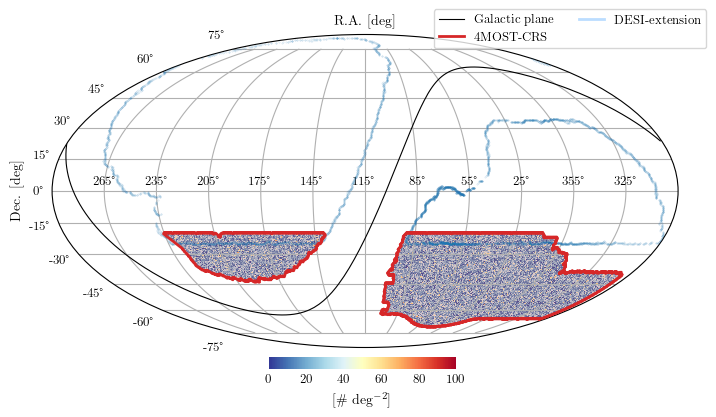

In [7]:

hpmap = utils.create_hp_map(ra[mask_s8fp], dec[mask_s8fp], nside=128)

# plot Sky map 
utils.plot_moll(hpmap, rot=115, min=0, max=100, desi_footprint_ext=True, fourmost_footprint=True)

In [8]:
utils.get_4most_skyaera()

Area ngc: 1442.5417995619432
Area sgc: 4299.561009147849
Total area: 5742.102808709793
